In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('icecream_vs_heater.csv')
df.head()

,Month,heater,ice cream
0,2004-01,27,13
1,2004-02,18,15
2,2004-03,14,16
3,2004-04,13,19
4,2004-05,13,21


In [3]:
df.Month = pd.to_datetime(df.Month)
df.head()

,Month,heater,ice cream
0,2004-01-01,27,13
1,2004-02-01,18,15
2,2004-03-01,14,16
3,2004-04-01,13,19
4,2004-05-01,13,21


In [4]:
df.set_index('Month',inplace=True)

In [5]:
df.head()

,heater,ice cream
Month,,
2004-01-01,27,13
2004-02-01,18,15
2004-03-01,14,16
2004-04-01,13,19
2004-05-01,13,21


In [6]:
df = df.asfreq(pd.infer_freq(df.index))
df

,heater,ice cream
Month,,
2004-01-01,27,13
2004-02-01,18,15
2004-03-01,14,16
2004-04-01,13,19
2004-05-01,13,21
...,...,...
2020-02-01,34,45
2020-03-01,25,44
2020-04-01,25,53


In [7]:
heater_series = pd.Series(df.heater)
heater_series

Month
2004-01-01    27
2004-02-01    18
2004-03-01    14
2004-04-01    13
2004-05-01    13
              ..
2020-02-01    34
2020-03-01    25
2020-04-01    25
2020-05-01    27
2020-06-01    24
Freq: MS, Name: heater, Length: 198, dtype: int64

In [8]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(heater_series,color='red')
    plt.ylabel('Search Frequency for heater',fontsize=16)
    for year in range(2004,2021):
        plt.axvline(pd.to_datetime(str(year)),linestyle='--',color='k',alpha=0.5)

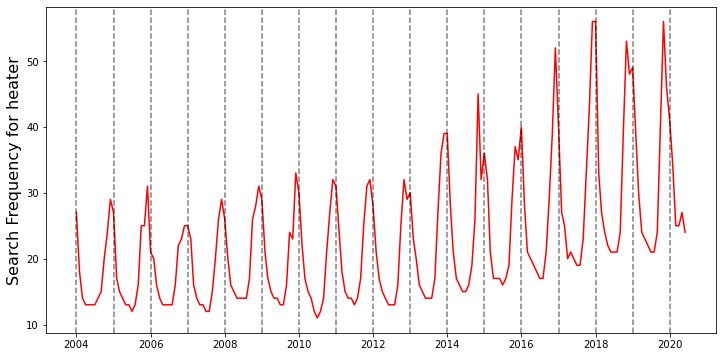

In [9]:
plot_series(heater_series)

### Normalize

In [10]:
avg = heater_series.mean()
dev = heater_series.std()
heater_series =  (heater_series-avg)/dev

In [11]:
heater_series

Month
2004-01-01    0.429490
2004-02-01   -0.489299
2004-03-01   -0.897650
2004-04-01   -0.999738
2004-05-01   -0.999738
                ...   
2020-02-01    1.144104
2020-03-01    0.225315
2020-04-01    0.225315
2020-05-01    0.429490
2020-06-01    0.123227
Freq: MS, Name: heater, Length: 198, dtype: float64

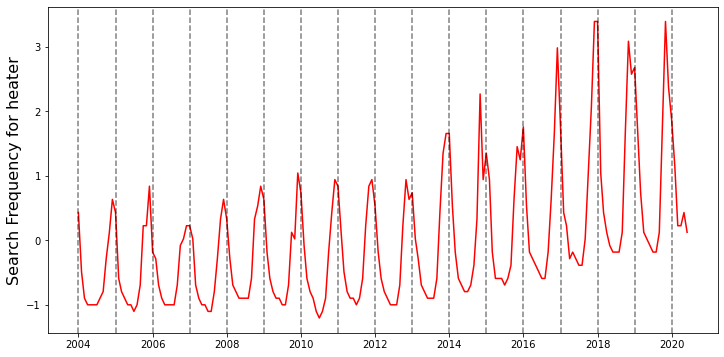

In [12]:
plot_series(heater_series)

### Take First difference to remove trend

In [13]:
heater_series = (heater_series - heater_series.shift(1)).dropna()

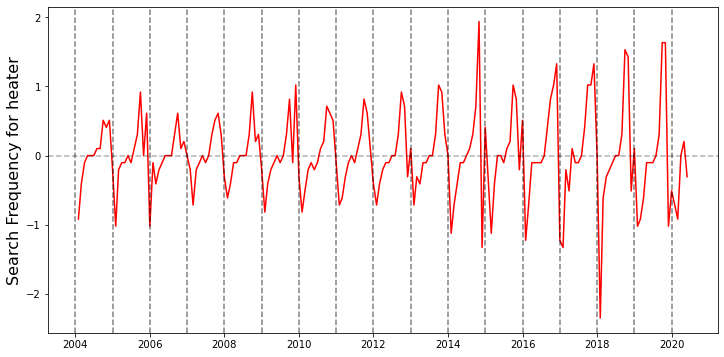

In [14]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

In [15]:
annual_volatility = heater_series.groupby(by=heater_series.index.year).std()
annual_volatility

Month
2004    0.415481
2005    0.474527
2006    0.400148
2007    0.359839
2008    0.396182
2009    0.499810
2010    0.459566
2011    0.443924
2012    0.471104
2013    0.503587
2014    0.855743
2015    0.569441
2016    0.719843
2017    0.830886
2018    0.987221
2019    0.892991
2020    0.426657
Name: heater, dtype: float64

In [16]:
heater_annual_vol = heater_series.index.map(lambda d: annual_volatility.loc[d.year])
heater_annual_vol[:13]

Float64Index([0.41548104705328814, 0.41548104705328814, 0.41548104705328814,
              0.41548104705328814, 0.41548104705328814, 0.41548104705328814,
              0.41548104705328814, 0.41548104705328814, 0.41548104705328814,
              0.41548104705328814, 0.41548104705328814,  0.4745272626453186,
               0.4745272626453186],
             dtype='float64', name='Month')

In [17]:
heater_series = heater_series/heater_annual_vol
heater_series

Month
2004-02-01   -2.211387
2004-03-01   -0.982838
2004-04-01   -0.245710
2004-05-01    0.000000
2004-06-01    0.000000
                ...   
2020-02-01   -1.674916
2020-03-01   -2.153463
2020-04-01    0.000000
2020-05-01    0.478547
2020-06-01   -0.717821
Freq: MS, Length: 197, dtype: float64

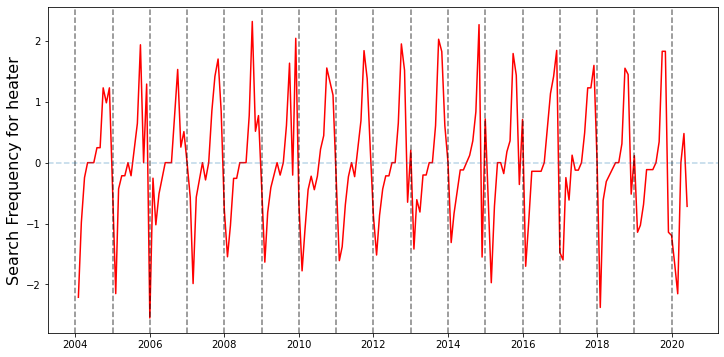

In [18]:
plot_series(heater_series)
plt.axhline(0,linestyle='--',alpha=0.3)

### Remove Seasonality

In [19]:
month_avgs = heater_series.groupby(by=heater_series.index.month).mean()

In [20]:
month_avgs

Month
1    -0.428360
2    -1.483129
3    -1.063595
4    -0.442926
5    -0.121663
6    -0.128425
7    -0.107093
8     0.075720
9     0.544638
10    1.613170
11    1.183118
12    0.491641
dtype: float64

In [21]:
heater_month_avg = heater_series.index.map(lambda d: month_avgs.loc[d.month])
heater_month_avg

Float64Index([  -1.483129277176665,  -1.0635953355687688, -0.44292637101368243,
               -0.1216626157216479, -0.12842542811874375, -0.10709260508002617,
               0.07572031336904017,   0.5446384049209764,   1.6131699911888606,
                1.1831180641276993,
              ...
                0.5446384049209764,   1.6131699911888606,   1.1831180641276993,
                0.4916411242912191,  -0.4283597874466263,   -1.483129277176665,
               -1.0635953355687688, -0.44292637101368243,  -0.1216626157216479,
              -0.12842542811874375],
             dtype='float64', name='Month', length=197)

In [22]:
heater_series = heater_series - heater_month_avg
heater_series

Month
2004-02-01   -0.728257
2004-03-01    0.080757
2004-04-01    0.197217
2004-05-01    0.121663
2004-06-01    0.128425
                ...   
2020-02-01   -0.191787
2020-03-01   -1.089868
2020-04-01    0.442926
2020-05-01    0.600210
2020-06-01   -0.589396
Freq: MS, Length: 197, dtype: float64

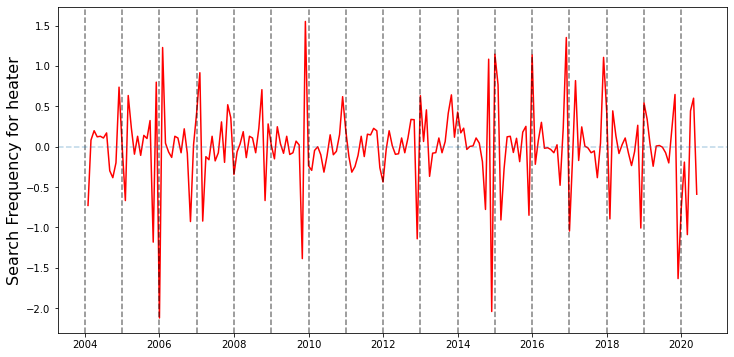

In [23]:
plot_series(heater_series)
plt.axhline(0,linestyle='--',alpha=0.3)